# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from unityagents import UnityEnvironment
import numpy as np
import pylab as plt
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [4]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
all_rewards = []
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    all_rewards += rewards
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.14999999664723873


When finished, you can close the environment.

env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [30]:
env_info.__dict__

{'visual_observations': [],
 'vector_observations': array([[ 0.00000000e+00, -4.00000000e+00,  0.00000000e+00,
          1.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -4.37113883e-08,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.00000000e+01,
          0.00000000e+00,  1.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -4.37113883e-08,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  7.90150642e+00,
         -1.00000000e+00,  1.25147498e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00, -2.99753308e-01]]),
 'text_observations': [''],
 'memories': array([], shape=(0, 0), dtype=float64),
 'rewards': [0.0],
 'local_done': [True],
 'max_reached': [True],
 'agents': [922],
 'previous_vector_actions': array([[0., 0., 0., 0.]]),
 'previous_text_actions': ['']}

In [8]:
class Task:
    def __init__(self, env, brain_name):
        self.env = env
        self.brain_name = brain_name
        self.reset()
        
        uniform = torch.distributions.Uniform(-1, 1)
        uniform._batch_shape = torch.Size([1, env.brains[brain_name].vector_action_space_size])
        
        self.action_space = uniform
        
    def reset(self, train_mode=False):
        out = self.env.reset(train_mode=train_mode)[brain_name]     # reset the environment
        return out.vector_observations
    
    def step(self, action):
        out = env.step(action)[self.brain_name]
        return (out.vector_observations, out.rewards, out.local_done, out.text_observations)

In [9]:
task = Task(env, brain_name)

In [10]:
config = {'env': env, 'action_dim': action_size, 'state_dim': state_size}
config['task'] = Task(env, brain_name)

In [11]:
config

{'env': <unityagents.environment.UnityEnvironment at 0x7f59c3225df0>,
 'action_dim': 4,
 'state_dim': 33,
 'task': <__main__.Task at 0x7f59f1a0adc0>}

In [12]:
task.action_space.sample()

tensor([[-0.7631, -0.5156, -0.6618,  0.2609]])

### Computing random reward

In [84]:
num_agents = 1
iterations = 100
all_scores = np.zeros((num_agents, iterations))
for iteration in range(iterations):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)

    scores = []
    while(True):
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        scores += rewards
        dones = env_info.local_done                        # see if episode finished
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    all_scores[:, iteration] = np.sum(scores)
    if (iteration+1) % 10 == 0:
        print(f"{1+iteration:2}: {np.mean(all_scores[:,iteration]):.3f} | avg. total: {np.mean(all_scores[:,:1+iteration]):.3f}")

print('Total score (averaged over agents) this episode: {}'.format(np.mean(all_scores)))

10: 0.000 | avg. total: 0.084
20: 0.000 | avg. total: 0.099
30: 0.100 | avg. total: 0.133
40: 0.170 | avg. total: 0.136
50: 0.000 | avg. total: 0.155
60: 0.510 | avg. total: 0.153
70: 0.000 | avg. total: 0.149
80: 0.000 | avg. total: 0.153
90: 0.000 | avg. total: 0.142
100: 0.000 | avg. total: 0.146
Total score (averaged over agents) this episode: 0.1459999967366457


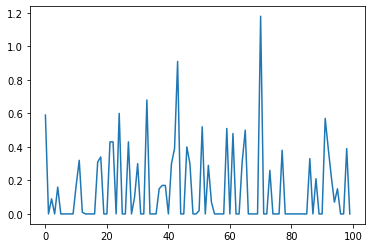

In [87]:
plt.plot(all_scores.mean(axis=0))

## My own invention

In [19]:
%autoreload
from DDPG_agent import DDPGAgent

agent = DDPGAgent(config)

In [20]:
print(agent.network)
print(agent.target_network)

DeterministicActorCriticNet(
  (phi_body): DummyBody()
  (actor_body): ActorBody(
    (layers): ModuleList(
      (0): Linear(in_features=33, out_features=400, bias=True)
      (1): Linear(in_features=400, out_features=300, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (critic_body): CriticBody(
    (fc1): Linear(in_features=33, out_features=300, bias=True)
    (fc2): Linear(in_features=304, out_features=300, bias=True)
  )
  (fc_action): Linear(in_features=300, out_features=4, bias=True)
  (fc_critic): Linear(in_features=300, out_features=1, bias=True)
)
DeterministicActorCriticNet(
  (phi_body): DummyBody()
  (actor_body): ActorBody(
    (layers): ModuleList(
      (0): Linear(in_features=33, out_features=400, bias=True)
      (1): Linear(in_features=400, out_features=300, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (critic_body): CriticBody(
    (fc1): Linear(in_features=33, out_features=300, bias=True)
    (fc2): Linear(in_features=304,

In [57]:
%%time
all_rewards = []
for idx in range(1, 501):
    rewards = agent.step()
    all_rewards.append(np.sum(rewards))
    print(f"{idx:2}: {all_rewards[-1]:.3f} | avg. last 100: {np.mean(all_rewards[-100:]):.3f}")

    if np.mean(all_rewards[-100:]) > 30:
        print("Obtained 30 on average! Awesome job everyone")
        torch.save(agent.network.state_dict(), 'checkpoint_network.pth')
        torch.save(agent.target_network.state_dict(), 'checkpoint_target_network.pth')
        break

 1: 0.800 | avg. last 100: 0.800
 2: 0.000 | avg. last 100: 0.400
 3: 0.300 | avg. last 100: 0.367
 4: 0.000 | avg. last 100: 0.275
 5: 0.000 | avg. last 100: 0.220
 6: 0.400 | avg. last 100: 0.250
 7: 0.700 | avg. last 100: 0.314
 8: 0.000 | avg. last 100: 0.275
 9: 0.000 | avg. last 100: 0.244
10: 0.000 | avg. last 100: 0.220
11: 0.400 | avg. last 100: 0.236
12: 0.000 | avg. last 100: 0.217
13: 2.600 | avg. last 100: 0.400
14: 1.000 | avg. last 100: 0.443
15: 2.300 | avg. last 100: 0.567
16: 0.000 | avg. last 100: 0.531
17: 1.400 | avg. last 100: 0.582
18: 0.700 | avg. last 100: 0.589
19: 7.300 | avg. last 100: 0.942
20: 4.500 | avg. last 100: 1.120
21: 4.200 | avg. last 100: 1.267
22: 4.400 | avg. last 100: 1.409
23: 4.600 | avg. last 100: 1.548
24: 4.000 | avg. last 100: 1.650
25: 4.600 | avg. last 100: 1.768
26: 5.300 | avg. last 100: 1.904
27: 8.300 | avg. last 100: 2.141
28: 5.500 | avg. last 100: 2.261
29: 6.700 | avg. last 100: 2.414
30: 11.100 | avg. last 100: 2.703
31: 14.10

In [85]:
def moving_average(a, n=100) :
    ret = np.cumsum(np.concatenate([np.zeros(n), a]), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    n_arr = np.clip(np.arange(1, len(a)+1), 1, n)
    return ret[n:] / n_arr

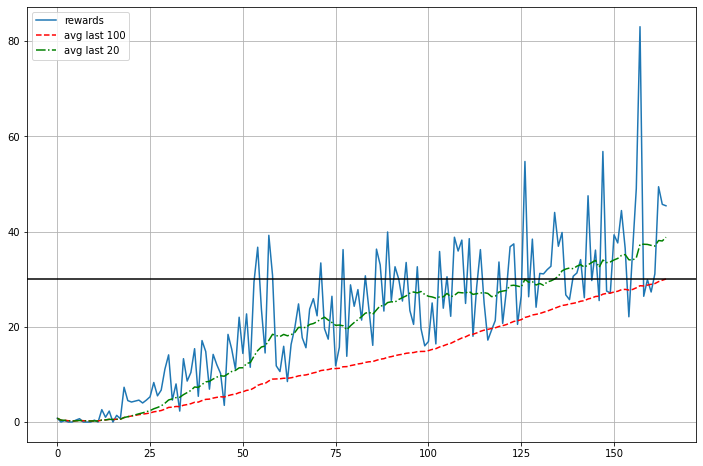

In [98]:
n = 100
plt.figure(figsize=(12, 8))
plt.plot(all_rewards, label='rewards')
plt.plot(moving_average(all_rewards, n=n), 'r--', label=f'avg last {n}')
plt.plot(moving_average(all_rewards, n=20), 'g-.', label=f'avg last {20}')
plt.axhline(30, color='black')
plt.grid(True)
plt.legend()

## Testing our invention

In [21]:
agent.network.load_state_dict(torch.load('checkpoint_network.pth'))
agent.target_network.load_state_dict(torch.load('checkpoint_target_network.pth'))

<All keys matched successfully>

In [43]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)

scores = []
while(True):
    actions = agent.eval_step(states)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    scores += env_info.rewards
    dones = env_info.local_done
    if np.any(dones):                                  # exit loop if episode finished
        break

scaled_rewards = (np.array(scores)!=0) * 0.1

print(f'Total (not adjusted) rewards this episode: {sum(scores)}')
print(f"Total reward (but adjusted to count that rewards aren't 0.1) this episode: {np.sum(scaled_rewards)}")

Total (not adjusted) rewards this episode: 20.469999542459846
Total reward (but adjusted to count that rewards aren't 0.1) this episode: 52.599999999999994
